In [1]:
%matplotlib inline

# ACCESS-S NetCDF DATA
'see http://access-s.clide.cloud/'

### By reading model out data from the ACCESS-S netcdf file, we create plots showing
    * Sea surface temperature
    * Precipitaion


In [2]:
# Importing Staffs
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import xarray as xr
import metpy

In [3]:
ncdf_file = 'rain_forecast_anom_weekly.nc'
ds = xr.open_dataset(ncdf_file)
print(ds)

<xarray.Dataset>
Dimensions:           (lon: 432, lat: 324, time: 5, ensemble_members: 1, init_date: 3, bounds: 2)
Coordinates:
  * lon               (lon) float32 0.4167 1.25 2.083 ... 357.9 358.8 359.6
  * lat               (lat) float32 -89.72 -89.17 -88.61 ... 88.61 89.17 89.72
  * time              (time) datetime64[ns] 2021-08-10T12:00:00 ... 2021-09-0...
  * ensemble_members  (ensemble_members) int32 99
Dimensions without coordinates: init_date, bounds
Data variables:
    rain              (time, lat, lon) float32 ...
    forecast_period   (time) |S29 ...
    ens_init_table    (init_date) |S13 ...
    time_bounds       (time, bounds) datetime64[ns] ...
Attributes: (12/43)
    title:                      Weekly ensemble mean anomaly of rainfall from...
    summary:                    Weekly mean of lagged anomaly super ensemble ...
    comment:                    Weekly mean of lagged anomaly super ensemble ...
    source:                     ACCESS-S1
    model_id:              

In [4]:
# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(ds['lon'], ds['lat'])

In [5]:
precip_water = ds['rain'][0]
precip_water = precip_water.metpy.convert_units('mm')

AttributeError: 'Figure' object has no attribute 'contourf'

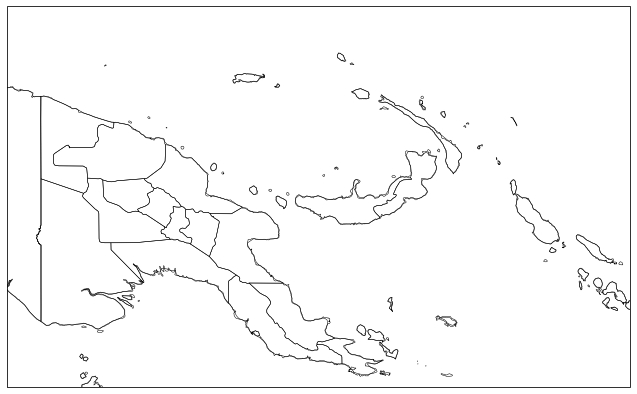

In [7]:
fig = plt.figure(figsize=[18,7])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([140., 158., -11., 0])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

cf4 = fig.contourf(lon_2d, lat_2d, precip_water, cmap='Blues',
                         transform=ccrs.PlateCarree(), zorder=0)
fig.set_title('Precipitable Water', fontsize=16)
cb4 = fig.colorbar(cf4, ax=fig, orientation='horizontal', shrink=0.74, pad=0)
cb4.set_label('mm', size='x-large')
